In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib as plt
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [48]:
training_dataset = pd.read_csv('apple.csv')
training_dataset

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2010-01-04,213.43,214.5000,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
1,2010-01-05,214.60,215.5900,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2,2010-01-06,214.38,215.2300,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
3,2010-01-07,211.75,212.0000,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
4,2010-01-08,210.30,212.0000,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,2016-12-23,115.59,116.5200,115.59,116.52,14249484.0,0.0,1.0,114.162295,115.080808,114.162295,115.080808,14249484.0
1758,2016-12-27,116.52,117.8000,116.49,117.26,18296855.0,0.0,1.0,115.080808,116.344998,115.051178,115.811668,18296855.0
1759,2016-12-28,117.52,118.0166,116.20,116.76,20905892.0,0.0,1.0,116.068456,116.558923,114.764760,115.317843,20905892.0
1760,2016-12-29,116.45,117.1095,116.40,116.73,15039519.0,0.0,1.0,115.011672,115.663027,114.962290,115.288214,15039519.0


In [49]:
print (training_dataset.isnull().sum())

total_null = training_dataset.isnull().sum().sum()
print ("The total number of null values is: " + str(total_null))

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64
The total number of null values is: 0


In [50]:
training_dataset.drop(['Date', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'], axis = 1, inplace = True)

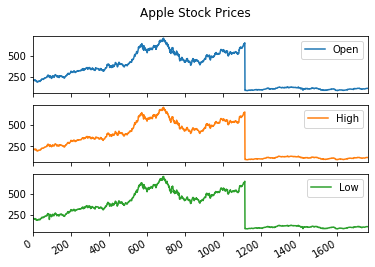

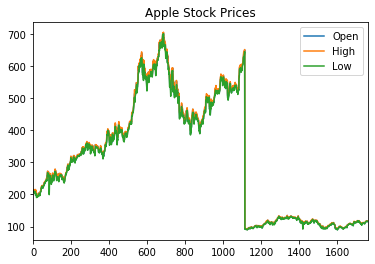

In [51]:
training_dataset.plot.line(subplots = True, title='Apple Stock Prices')
training_dataset.plot(title='Apple Stock Prices')

In [52]:
training_dataset.drop(['High', 'Low'], axis = 1, inplace = True)
training_dataset.drop(training_dataset.tail(2).index,inplace=True)
print(training_dataset)
print(training_dataset.shape)

        Open
0     213.43
1     214.60
2     214.38
3     211.75
4     210.30
...      ...
1755  116.80
1756  116.35
1757  115.59
1758  116.52
1759  117.52

[1760 rows x 1 columns]
(1760, 1)


In [53]:
train_data = training_dataset.to_numpy()
train_data

array([[213.43],
       [214.6 ],
       [214.38],
       ...,
       [115.59],
       [116.52],
       [117.52]])

In [54]:
dataset_train = np.array(train_data[:int(train_data.shape[0]*0.8)])
dataset_test = np.array(train_data[int(train_data.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1408, 1)
(352, 1)


In [55]:
scalar = MinMaxScaler(feature_range = (0,1))
train_data = scalar.fit_transform(dataset_train)
train_data.shape

(1408, 1)

In [56]:
x_train = train_data[0:1407]
y_train = train_data[1:1408]

x_train = np.reshape(x_train, (1407,1,1))
x_train.shape

(1407, 1, 1)

In [57]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(None, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, None, 96)          37632     
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 96)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 96)          74112     
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 96)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 96)          74112     
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 96)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 96)               

In [58]:
model.compile(optimizer = 'adam', loss = "mean_squared_error")

In [59]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1478
Epoch 2/100
1407/1407 [==============================] - 1s 444us/step - loss: 0.0252
Epoch 3/100
1407/1407 [==============================] - 1s 484us/step - loss: 0.0059
Epoch 4/100
1407/1407 [==============================] - 1s 445us/step - loss: 0.0050
Epoch 5/100
1407/1407 [==============================] - 1s 452us/step - loss: 0.0039
Epoch 6/100
1407/1407 [==============================] - 1s 466us/step - loss: 0.0032
Epoch 7/100
1407/1407 [==============================] - 1s 504us/step - loss: 0.0032
Epoch 8/100
1407/1407 [==============================] - 1s 673us/step - loss: 0.0033
Epoch 9/100
1407/1407 [==============================] - 1s 521us/step - loss: 0.0027
Epoch 10/100
1407/1407 [==============================] - 1s 617us/step - loss: 0.0027
Epoch 11/100
1407/1407 [==============================] - 1s 613us/step - loss: 0.0029
Epoch 12/100
1407/1407 [==============================

1407/1407 [==============================] - 1s 872us/step - loss: 0.0018
Epoch 95/100
1407/1407 [==============================] - 1s 858us/step - loss: 0.0019
Epoch 96/100
1407/1407 [==============================] - 1s 846us/step - loss: 0.0019
Epoch 97/100
1407/1407 [==============================] - 1s 680us/step - loss: 0.0018
Epoch 98/100
1407/1407 [==============================] - 1s 652us/step - loss: 0.0017
Epoch 99/100
1407/1407 [==============================] - 1s 474us/step - loss: 0.0019
Epoch 100/100
1407/1407 [==============================] - 1s 473us/step - loss: 0.0017


In [60]:
print(dataset_test)
print(dataset_test.shape)

[[114.58 ]
 [116.53 ]
 [117.81 ]
 [112.53 ]
 [116.04 ]
 [114.32 ]
 [116.04 ]
 [116.43 ]
 [116.1  ]
 [114.08 ]
 [110.43 ]
 [ 94.87 ]
 [111.11 ]
 [107.085]
 [112.25 ]
 [112.17 ]
 [112.13 ]
 [110.18 ]
 [110.   ]
 [112.49 ]
 [108.97 ]
 [111.65 ]
 [113.76 ]
 [110.27 ]
 [111.79 ]
 [116.58 ]
 [115.93 ]
 [116.25 ]
 [115.66 ]
 [112.21 ]
 [113.67 ]
 [113.38 ]
 [113.63 ]
 [113.25 ]
 [116.44 ]
 [113.85 ]
 [112.83 ]
 [110.17 ]
 [109.07 ]
 [108.01 ]
 [109.88 ]
 [110.63 ]
 [111.74 ]
 [110.19 ]
 [110.   ]
 [112.73 ]
 [110.82 ]
 [111.29 ]
 [110.93 ]
 [111.78 ]
 [110.8  ]
 [111.34 ]
 [114.   ]
 [114.33 ]
 [116.7  ]
 [118.08 ]
 [115.4  ]
 [116.93 ]
 [118.7  ]
 [120.99 ]
 [119.87 ]
 [120.79 ]
 [123.13 ]
 [121.85 ]
 [121.11 ]
 [120.96 ]
 [116.9  ]
 [116.37 ]
 [116.26 ]
 [115.2  ]
 [111.38 ]
 [114.92 ]
 [115.76 ]
 [117.64 ]
 [119.2  ]
 [119.27 ]
 [117.33 ]
 [119.21 ]
 [118.29 ]
 [117.99 ]
 [118.75 ]
 [117.05 ]
 [116.55 ]
 [115.29 ]
 [118.98 ]
 [117.52 ]
 [117.64 ]
 [116.04 ]
 [115.19 ]
 [112.18 ]
 [111.94 ]

In [61]:
inputs = np.reshape(scalar.transform(dataset_test), (352,1,1))
stock_prediction = scalar.inverse_transform(model.predict(inputs))
stock_prediction

array([[110.71531 ],
       [112.45096 ],
       [113.59271 ],
       [108.89552 ],
       [112.01439 ],
       [110.48422 ],
       [112.01439 ],
       [112.36183 ],
       [112.06784 ],
       [110.27099 ],
       [107.03656 ],
       [ 93.42711 ],
       [107.63794 ],
       [104.086395],
       [108.64736 ],
       [108.57649 ],
       [108.54102 ],
       [106.81561 ],
       [106.656586],
       [108.86006 ],
       [105.74726 ],
       [108.11589 ],
       [109.98678 ],
       [106.89515 ],
       [108.23987 ],
       [112.49549 ],
       [111.91643 ],
       [112.20145 ],
       [111.67604 ],
       [108.61192 ],
       [109.906876],
       [109.64946 ],
       [109.87135 ],
       [109.5341  ],
       [112.370735],
       [110.06671 ],
       [109.161514],
       [106.80678 ],
       [105.83549 ],
       [104.90087 ],
       [106.550575],
       [107.213394],
       [108.19558 ],
       [106.82446 ],
       [106.656586],
       [109.072845],
       [107.38141 ],
       [107.7

In [62]:
stock_prediction = np.squeeze(stock_prediction)
stock_prediction

array([110.71531 , 112.45096 , 113.59271 , 108.89552 , 112.01439 ,
       110.48422 , 112.01439 , 112.36183 , 112.06784 , 110.27099 ,
       107.03656 ,  93.42711 , 107.63794 , 104.086395, 108.64736 ,
       108.57649 , 108.54102 , 106.81561 , 106.656586, 108.86006 ,
       105.74726 , 108.11589 , 109.98678 , 106.89515 , 108.23987 ,
       112.49549 , 111.91643 , 112.20145 , 111.67604 , 108.61192 ,
       109.906876, 109.64946 , 109.87135 , 109.5341  , 112.370735,
       110.06671 , 109.161514, 106.80678 , 105.83549 , 104.90087 ,
       106.550575, 107.213394, 108.19558 , 106.82446 , 106.656586,
       109.072845, 107.38141 , 107.797226, 107.47871 , 108.23101 ,
       107.363716, 107.84147 , 110.19992 , 110.493126, 112.60247 ,
       113.8338  , 111.44462 , 112.80753 , 114.38774 , 116.437706,
       115.43432 , 116.25843 , 118.35901 , 117.20916 , 116.54529 ,
       116.41079 , 112.78079 , 112.30838 , 112.21034 , 111.266655,
       107.876884, 111.0176  , 111.765045, 113.44096 , 114.834

In [63]:
stock_prediction = stock_prediction.reshape(-1,1)
stock_prediction

array([[110.71531 ],
       [112.45096 ],
       [113.59271 ],
       [108.89552 ],
       [112.01439 ],
       [110.48422 ],
       [112.01439 ],
       [112.36183 ],
       [112.06784 ],
       [110.27099 ],
       [107.03656 ],
       [ 93.42711 ],
       [107.63794 ],
       [104.086395],
       [108.64736 ],
       [108.57649 ],
       [108.54102 ],
       [106.81561 ],
       [106.656586],
       [108.86006 ],
       [105.74726 ],
       [108.11589 ],
       [109.98678 ],
       [106.89515 ],
       [108.23987 ],
       [112.49549 ],
       [111.91643 ],
       [112.20145 ],
       [111.67604 ],
       [108.61192 ],
       [109.906876],
       [109.64946 ],
       [109.87135 ],
       [109.5341  ],
       [112.370735],
       [110.06671 ],
       [109.161514],
       [106.80678 ],
       [105.83549 ],
       [104.90087 ],
       [106.550575],
       [107.213394],
       [108.19558 ],
       [106.82446 ],
       [106.656586],
       [109.072845],
       [107.38141 ],
       [107.7

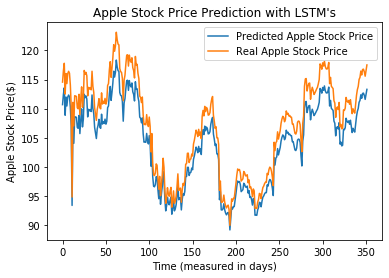

In [65]:
plt.plot(stock_prediction, label = 'Predicted Apple Stock Price', linewidth = 1.5)
plt.plot(dataset_test, label = 'Real Apple Stock Price', linewidth = 1.5)
plt.title("Apple Stock Price Prediction with LSTM's")
plt.xlabel('Time (measured in days)')
plt.ylabel('Apple Stock Price($)')
plt.legend()
plt.show()

In [66]:
rmse_value = math.sqrt(mean_squared_error(dataset_test, stock_prediction))
rmse_value

3.119228782527455

In [82]:
maxValTest = max(dataset_test)
minValTest = min(dataset_test)
print ("The real maximum stock price is: " + str(maxValTest))
print ("The real minimum stock price is: " + str(minValTest))

The real maximum stock price is: [123.13]
The real minimum stock price is: [90.]


In [84]:
maxValPredict = max(stock_prediction)
minValPredict = min(stock_prediction)
print ("The predicted maximum stock price is: " + str(maxValPredict))
print ("The predicted minimum stock price is: " + str(minValPredict))

The predicted maximum stock price is: [118.35901]
The predicted minimum stock price is: [89.227356]
